# Symbolic algebra with Sympy

So far the only mathematical computations we have done with Python have been numerical.  That is, we used Python to give us numerical answers to our problems.  However, Python is also capable of performing symbolic calculations, such as simplifying algebra, factoring polynomials, differentiation, integration, etc.  This is known as symbolic algebra.  In this notebook, we will look at how we can perform symbolic calculations with the library `Sympy`.

The first step in performing symbolic calculation is to define the variables which we will manipulate.  This is done through the Sympy function `symbols`:

In [18]:
import sympy as sp

x = sp.symbols('x')
a, b, c = sp.symbols('a b c')

f = sp.sin(x)

y = a*x**2 + b*x + c

It is important not to confuse the variables `x` or `f` with a number or a variable that is a number.  These variables are symbolic expressions of type `symbol` that do not evalute to a numerical value.

## Simplifying expressions

We can try to simplify algebraic expression using the Sympy function `simplify`

In [19]:
f = sp.sin(x)**2 + sp.cos(x)**2
print(f)

F = sp.simplify(f)
print(F)

f = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
print(f)

F = sp.simplify(f)
print(F)

sin(x)**2 + cos(x)**2
1
(x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
x - 1


We can expand expressions using the function `expand`

In [20]:
f = (x+2)*(x-3)
print(f)

F = sp.expand(f)
print(F)

(x - 3)*(x + 2)
x**2 - x - 6


We can also use Sympy to factor polynomials using the function `factor`:

In [21]:
f = x**2 + 2*x + 1

F = sp.factor(f)
print(F)

(x + 1)**2


## Partial fractions decomposition

The function `apart` can be used to perform partial fractions decomposition of rational functions:

In [22]:
f = 1/((x+2)*(x+5))
F = sp.apart(f, x)
print(F)

-1/(3*(x + 5)) + 1/(3*(x + 2))


## Differentiation

In [23]:
print(sp.diff(f, x))

-1/((x + 2)*(x + 5)**2) - 1/((x + 2)**2*(x + 5))


## Integration

In [24]:
print(sp.integrate(f, x))

log(x + 2)/3 - log(x + 5)/3


Definite integral...

\begin{align*}
I = \int_{a}^{b} dx\,\sin(x)
\end{align*}

In [25]:
a, b = sp.symbols('a b')

I = sp.integrate(sp.sin(x), (x, a, b))
print(I)

cos(a) - cos(b)


## Converting symbolic expressions to numeric functions

While symbolic expressions are convenient for performing manipulations, often we require numeric values.  Sympy allows us to convert expressions into functions that can be evaluated numerically with the =lambdify= method.


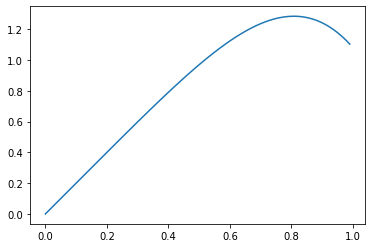

In [26]:
import sympy as sp
import numpy as np


func = sp.lambdify(x, sp.diff(sp.sin(x**2),x)  )


import numpy as np

x_data = np.arange(0.0, 1.0, 0.01)
y_data = [func(x) for x in x_data]

import pylab as plt

plt.plot(x_data, y_data)
plt.show()


## Example: Enthalpy of the Shomate equation

We have seen previously that the
The molar heat capacity is given by
\begin{align*}
C_p(T)
&= A + B t + C t^2 + D t^3 + E t^{-2}
\end{align*}
where $T$ is absolute temperature in kelvin, $t=T/1000$, $C_p$ is molar heat capacity in ${\rm J\,mol^{-1}\,K^{-1}}$, and $A$, $B$, $C$, $D$, and $E$ are constants


The parameters of the Shomate equation for nitrogen are given below (taken from the [NIST webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7727379&Type=JANAFG&Table=on#JANAFG)):

| Temperature / K | $100.$ - $500.$ | $500.$ - $2000.$ | $2000.$ - $6000.$ |
|:--- | ---:| ---:| ---:|
| $A$             |   $ 28.98641$ |    $ 19.50583$ |     $ 35.51872$ |
| $B$             |   $ 1.853978$ |    $ 19.88705$ |     $ 1.128728$ |
| $C$             |   $-9.647459$ |    $-8.598535$ |     $-0.196103$ |
| $D$             |   $ 16.63537$ |    $ 1.369784$ |     $ 0.014662$ |
| $E$             |   $ 0.000117$ |    $ 0.527601$ |     $-4.553760$ |



In [32]:
R = 8.314
T0 = 298.15

Hf = 0.0
Gf = 0.0
A =  28.98641
B =  1.853978
C = -9.647459
D =  16.63537
E =  0.000117 

T = sp.symbols('T')
A, B, C, D, E = sp.symbols('A B C D E')
Hf, Gf, Tf = sp.symbols('Hf, Gf, Tf')

t = T / 1000

Cp = A + B*t + C*t**2 + D*t**3 + E*t**(-2)



I_H = Hf + sp.integrate(Cp, (T, Tf, T))
I_H.simplify()
print(I_H)



A*T - A*Tf + B*T**2/2000 - B*Tf**2/2000 + C*T**3/3000000 - C*Tf**3/3000000 + D*T**4/4000000000 - D*Tf**4/4000000000 + 1000000*E/Tf - 1000000*E/T + Hf


We now have a symbolic expression for the enthalpy of nitrogen as a function of temperature.

In [36]:
H = sp.lambdify([T, A, B, C, D, E, Hf, Tf], I_H)
print(H)

enthalpy = H(298.15, 28.98641, 1.853978, -9.647459, 16.63537, 0.000117, 0.0, 298.15)
print(enthalpy)

enthalpy = H(300.0, 28.98641, 1.853978, -9.647459, 16.63537, 0.000117, 0.0, 298.15)
print(enthalpy)

<function _lambdifygenerated at 0x7eff32630430>
0.0
53.87992895336674


We now have a function called `H` that takes six arguments, and returns the molar enthalpy.  The first argument is the absolute temperature of the system, while the remaining five arguments are the coefficients of the Shomate equation.  Let's plot this for nitrogen in the temperature range from $100\,{\rm K}$ to $500\,{\rm K}$

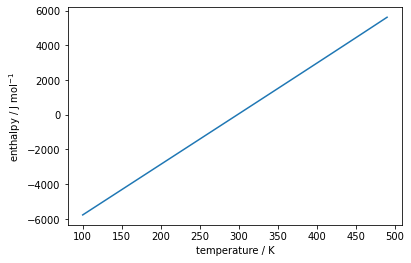

In [29]:
import pylab as plt
import numpy as np

T_data = np.arange(100.0, 500.0, 10.0)
H_data = [H(T, 28.98641, 1.853978, -9.647459, 16.63537, 0.000117) for T in T_data]

plt.plot(T_data, H_data)
plt.xlabel('temperature / K')
plt.ylabel(r'enthalpy / J mol$^{{-1}}$')
plt.show()

The difficulty of using the function we have created to calculate the enthalpy is that it only applies to the temperature range around $25^\circ{\rm C}$.  Can you think of a way to create a function to get around this problem?

As you will learn later in thermodynamics, the enthalpy can be written in terms of the Gibbs energy through the Gibbs-Helmholtz equation:
\begin{align*}
H = \frac{\partial(G/T)}{\partial(1/T)}
\end{align*}
By integrating this relation, 
The Gibbs energy can be determined from the enthalpy:
\begin{align*}
\frac{G(T)}{RT}
%&= \frac{G_f}{RT_f}
%+ \int_{T_f}^{T} d\frac{1}{RT'} H(T')
%\\
&= \frac{G_f}{RT_f}
- \int_{T_f}^{T} dT'\, \frac{H(T')}{RT'^2} 
\end{align*}
where $T_f=298.15\,{\rm K}$.

In [34]:
I_G = Gf/(R*Tf) - sp.integrate(I_H/T**2, (T, Tf, T))

print(I_G)

def get_GRT(T):
    T0 = 298.15
    GRT = 0.0
    for k, prop in data.items():
        Gf = prop['Gf']
    return GRT

(6000000000*A*T**2*Tf + 2000000*B*T**3*Tf + 1000*C*T**4*Tf + 3*D*T**5*Tf/5 - 12000000000000000*E*Tf*log(T) + T*(-12000000000*A*Tf**2 - 6000000*B*Tf**3 - 4000*C*Tf**4 - 3*D*Tf**5 + 12000000000000000*E + 12000000000*Hf*Tf))/(12000000000*Tf)
0.120279047389945*Gf/Tf - (12000000000*A*Tf*log(T) + 6000000*B*T*Tf + 2000*C*T**2*Tf + D*T**3*Tf + (6000000000000000*E*Tf + T*(12000000000*A*Tf**2 + 6000000*B*Tf**3 + 4000*C*Tf**4 + 3*D*Tf**5 - 12000000000000000*E - 12000000000*Hf*Tf))/T**2)/(12000000000*Tf) + (12000000000*A*Tf*log(Tf) + 6000000*B*Tf**2 + 2000*C*Tf**3 + D*Tf**4 + (6000000000000000*E*Tf + Tf*(12000000000*A*Tf**2 + 6000000*B*Tf**3 + 4000*C*Tf**4 + 3*D*Tf**5 - 12000000000000000*E - 12000000000*Hf*Tf))/Tf**2)/(12000000000*Tf)


## Additional resources

- [Sympy documentation page](https://docs.sympy.org/latest/tutorial/index.html)